In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpl
import scipy
import sklearn

In [4]:
#Wisconsin Breast Cancer dataset
import matplotlib.pyplot as plt
import io
import pandas as pd
from sklearn.preprocessing import StandardScaler

Cancer = pd.read_csv(r'C:\Users\PC\Documents\R\Cancerdata.csv')
                 #header=None, encoding='utf-8')
pd.set_option('display.max_rows', 5)

# drop the ID column
Cancer.drop(['id'], axis=1, inplace = True)

#strip() takes out leading and trailing spaces
Cancer.columns.str.strip()

#View the first five rows
Cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Plot of Histogram showing the distribution of each feature


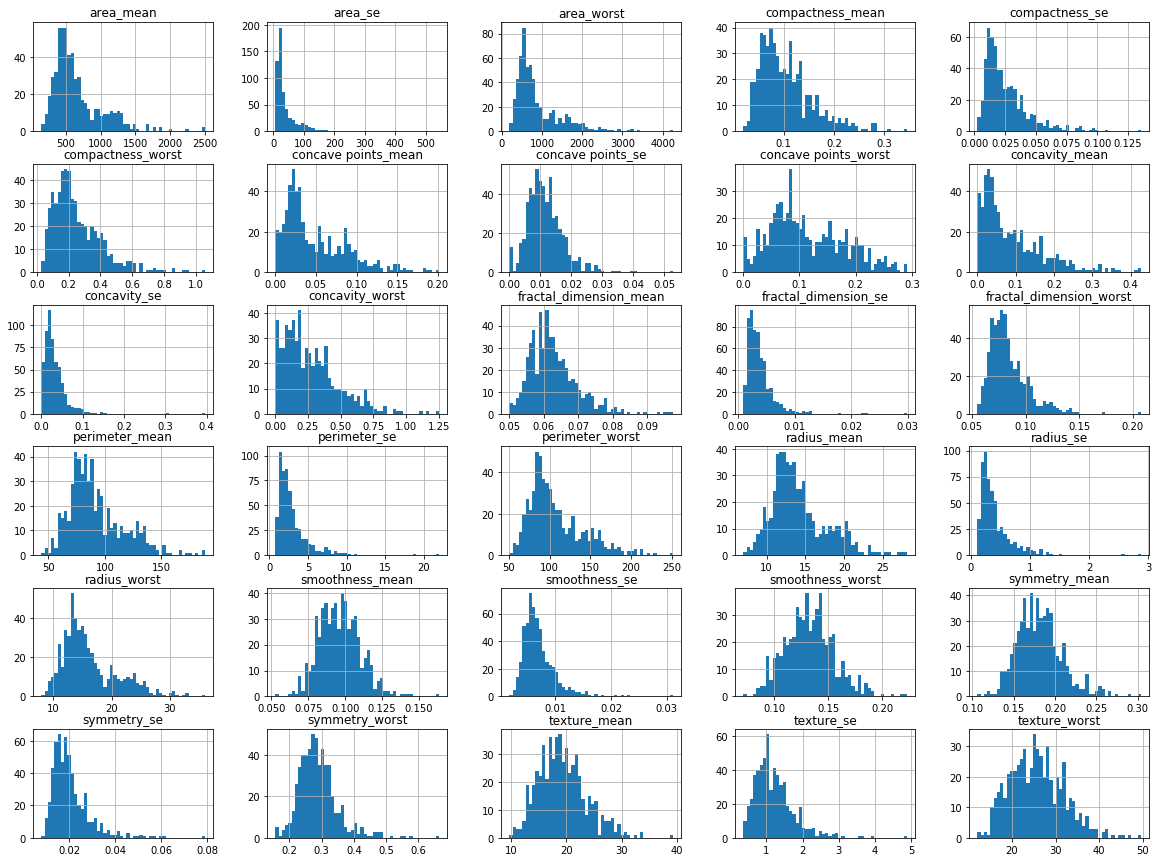

In [5]:
print('Plot of Histogram showing the distribution of each feature')
Cancer.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
print('Encode the Categorical column--------[Done]')
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Diagnosis = Cancer["diagnosis"]
Diagnosis_encoded = encoder.fit_transform(Diagnosis)
Cancer["diagnosis"]=Diagnosis_encoded

Encode the Categorical column--------[Done]


In [8]:
# Seperate the y from the x columns
X = Cancer.drop('diagnosis',axis=1)
Y = Cancer['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.30, random_state=1)
print('--------------- Split-out dataset [Done]')

--------------- Split-out dataset [Done]


Applying dimensionality Reduction using Principal Component Analysis [PCA]
Best parameter (CV score=0.980):
{'m__C': 100, 'm__gamma': 0.001, 'm__kernel': 'rbf', 'pca__n_components': 10}


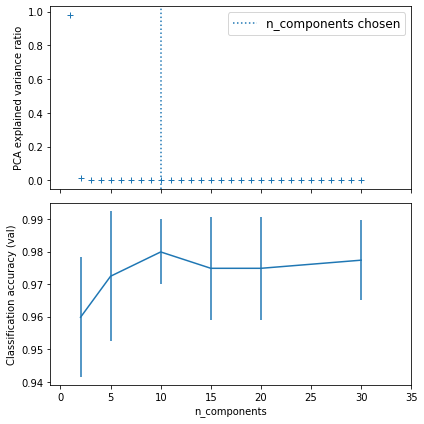

In [10]:
print('Applying dimensionality Reduction using Principal Component Analysis [PCA]')
from sklearn.svm import SVC

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model4 = SVC(probability=True)

pipe_svc = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model4)])


# set parameters of pipelines using ‘__’ separated parameter names:
param_grid = [{"pca__n_components": [2,5,10,15,20,30],
              'm__kernel': ['rbf'], 'm__gamma': [1e-3, 1e-4],
              'm__C': [1, 10,100,1000]},
              {'m__kernel': ['linear'], 'm__C': [1, 10,100,1000]}]

search = GridSearchCV(pipe_svc, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_svc = search.fit(X_train, y_train)
#Get Best Parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 35)

plt.tight_layout()
plt.show()

In [13]:
#----------Test Best Parameters---------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time
t0 = time()
clf_svc =clf_svc.best_estimator_
y_pred_svc = clf_svc.predict(X_validation)
print("Done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cv_svc = cross_val_score(clf_svc, X_train, y_train, cv=cv)

scores = cross_val_score(clf_svc, X_validation, y_validation, scoring='roc_auc', cv=cv, n_jobs=-1)



Done in 0.002s


In [14]:
#---------Classification report--------
print ("----------------------> [Support Vector performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred_svc, y_validation)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_svc.mean(),
                                          scores_cv_svc.std()),
                                          end="\n\n" )
print(confusion_matrix(y_validation,y_pred_svc))
print(classification_report(y_validation,y_pred_svc))
print('Mean ROC AUC: %.3f' % scores.mean(), end="\n\n")
print('Misclassified examples: %d' % (y_validation != y_pred_svc).sum())
print('Misclassification/Error rate: %.3f' % ((y_validation != y_pred_svc).sum()/y_pred_svc.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf_svc.score(X_validation, y_validation)))
print("Training set Accuracy: {:.3f}".format(clf_svc.score(X_train, y_train)))
print('--------------- Support Vector Classifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [Support Vector performance summary]
Accuracy: 0.971
mean: 0.977 (std: 0.018)

[[107   1]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Mean ROC AUC: 0.995

Misclassified examples: 5
Misclassification/Error rate: 0.083 %
Test set Accuracy: 0.971
Training set Accuracy: 0.985
--------------- Support Vector Classifier --Parameters specified-- : classifier.fit [Done]


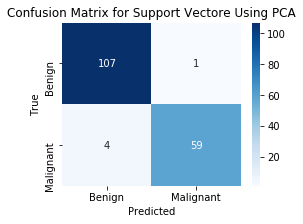

In [15]:
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_validation, y_pred_svc)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], 
            yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for Support Vectore Using PCA");


Prediction accuracy for the standardized test dataset with PCA -SVC
97.08%


PC 1 with:
 [0.22840435 0.11459603 0.23535896 0.23006804 0.13287554 0.23665125
 0.25728371 0.26063846 0.12980642 0.04072285 0.20668039 0.01403714
 0.21082108 0.20303925 0.00920246 0.16404168 0.15189164 0.17759851
 0.02342551 0.09062191 0.23340006 0.1129634  0.24101228 0.22996358
 0.12075504 0.20839579 0.23202745 0.24934109 0.11715877 0.12319076]

PC 2 with:
 [-0.21279079 -0.06584905 -0.1951508  -0.20926326  0.19756295  0.16214611
  0.06508838 -0.02336025  0.19063184  0.37857151 -0.09065476  0.10210316
 -0.07890224 -0.13730365  0.22275577  0.25267161  0.21665334  0.15427451
  0.18942265  0.30374253 -0.2080996  -0.06010889 -0.18944108 -0.20663622
  0.16229606  0.13041973  0.08349775 -0.01238619  0.10660055  0.27448168]


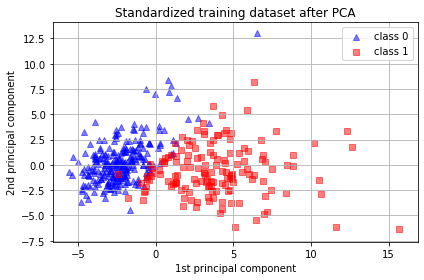

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt

FIG_SIZE = (10, 7)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_svc.fit(X_train, y_train)
pred_test_std = pipe_svc.predict(X_validation)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA -SVC')
print('{:.2%}\n'.format(metrics.accuracy_score(y_validation, pred_test_std)))

# Extract PCA from pipeline
pca_std = pipe_svc.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_svc.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training dataset after PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()

plt.show()

In [1]:
#importing dataset and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpl

In [2]:
import io

df =pd.read_csv(r'C:\Users\evan-\Downloads\Creditcard.csv', skiprows = 1)
pd.options.display.max_rows = 10 #10 max rows so going forward it's not so messy to look at

df.head() #showing first 5 rows here

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# ID adds nothing, drop it like it's hot
df.drop(['ID'], inplace = True, axis = 1)

In [4]:
# Sex is antiquated, change that (to Gender) and Limit Bal (to Limit), 'Default payment next month' to 'Default'
df=df.rename(columns={'SEX':'GENDER', 'LIMIT_BAL':'LIMIT', 'Default payment next month':'DEFAULT'})

In [5]:
#let's check for null values.
df.isnull().sum()/df.shape[0]


LIMIT                         0.0
GENDER                        0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
                             ... 
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
Length: 24, dtype: float64

In [6]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [7]:
# Education: 5, 6, 0 denote 'Other'. That's too many; I want to replace those with 4 for a catchall 'Other' category

df['EDUCATION']=np.where(df['EDUCATION']==5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION']==6, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION']==0, 4, df['EDUCATION'])

In [8]:
#isolate Independent Var, X (pay_0:pay_6) and Dependent Var, Y (Default) using pandas manipulation.
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop('default payment next month', axis=1)
y = df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=33, stratify = y)
# split this ish
# scale 
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [9]:
from sklearn.decomposition import PCA # keep the first two principal components of the data 

pca = PCA(n_components=2) # fit PCA model to breast cancer data 
pca.fit(X_scaled)# transform data onto the first two principal components 

X_pca = pca.transform(X_scaled) 

In [10]:
from sklearn.decomposition import PCA

pca	= PCA(n_components = 2) 
X2D	= pca.fit_transform(X)

pca.explained_variance_ratio_

print("The  reduced features account for the following % variability in Credit Card dataset:\n "
      , pca.explained_variance_ratio_)
# reducing to 2 features using PCA, 98% of the variance is explained by the first dimenstion, 1.6% by the second

The  reduced features account for the following % variability in Credit Card dataset:
  [0.61043701 0.29535381]


In [11]:
import numpy as np

pca	= PCA() 
pca.fit(X) 
cumsum = np.cumsum(pca.explained_variance_ratio_) 
d = np.argmax(cumsum >= 0.95) + 1
d
# compute PCA without reducing dimensionality, then computes minumum number of dimensions required
# to preserve 95% of the training set's variance
# 1 feature accounts for greater than or equal to 95% of the training dataset's variabiltiy

4

Text(0.5, 1.0, '\nExplained Variance by # of Dimensions using PCA\n')

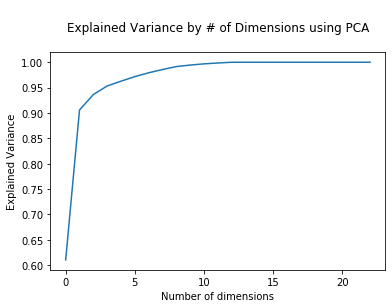

In [12]:
# Explained variance

# scale it

from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.plot(cumsum)
plt.xlabel("Number of dimensions")
plt.ylabel("Explained Variance")
plt.title("\nExplained Variance by # of Dimensions using PCA\n")
# pretty much all of the variability is explained after 2 dimensions

C:\Users\evan-\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\evan-\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'Second principal component')

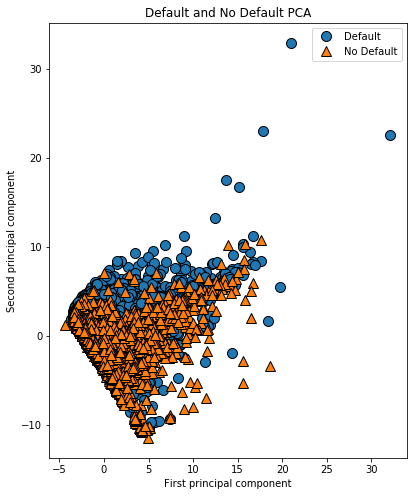

In [13]:
import numpy as np

import mglearn

# plot the 2 principal components

# plot first vs. second principal component, colored by class 
plt.figure(figsize=(8, 8)) 
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y) 
plt.legend(["Default", "No Default"],
           loc="best") 
plt.gca().set_aspect("equal") 
plt.title("Default and No Default PCA")
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")



C:\Users\evan-\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters (CV score = 81.22%)
Best parameters:
{'pca__n_components': 20, 'm__subsample': 0.8, 'm__silent': 0, 'm__reg_lambda': 50.0, 'm__min_child_weight': 1.0, 'm__max_depth': 20, 'm__gamma': 0, 'm__eta': 0.1, 'm__colsample_bytree': 0.9, 'm__colsample_bylevel': 0.8, 'm__booster': 'gbtree'}




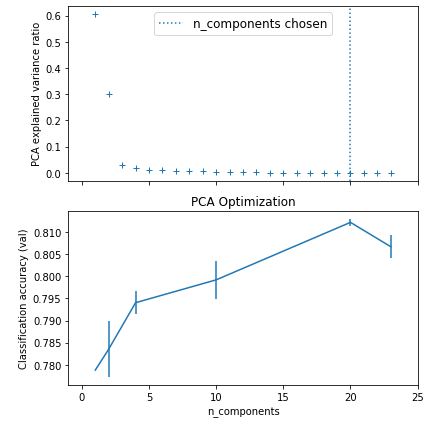

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model1 = XGBClassifier()

pipe_xg = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model1)]) # set up the pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=33, stratify = y)
# setting the stratify parameter makes a split so that the proportion of values in the sample
# produced will be the same as the proportion of values provided, ie correct proportion of Default to No Default

# set parameters of pipelines using ‘__’ separated parameter names:

param_grid = {"pca__n_components":[1,2,3,4,5, 10, 15, 20, 23],
              'm__silent': [0],
              'm__max_depth': [6, 10, 15, 20],
              'm__eta': [0.001, 0.01, 0.1, 0.2, 0,3], #learning rate
              'm__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
              'm__gamma': [0, 0.25, 0.5, 1.0],
              'm__reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], #L2 default is 1, akin to Ridge regression
              'm__booster':['gbtree']
              }

search = RandomizedSearchCV(pipe_xg, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_xg = search.fit(X_train, y_train)
#Get Best Parameters
best_param_score = search.best_score_ *100
print("Best parameters (CV score = {:.2f}%)".format(best_param_score))
print("Best parameters:")
print(search.best_params_)
print('\n')

# Plot the PCA spectrum
pca.fit(X_train)

#plot

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
plt.title("PCA Optimization")
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('\nClassification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 25)

plt.tight_layout()
plt.show()



SVM

In [15]:
print('Applying dimensionality Reduction using Principal Component Analysis [PCA]')
from sklearn.svm import SVC

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model4 = SVC(probability=True)

pipe_svc = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model4)])

# set parameters of pipelines using ‘__’ separated parameter names:
param_grid = {"pca__n_components": [2,5,10,15,20,23],
              'm__kernel': ['rbf'], 
              'm__gamma': [1e-3, 1e-4],
              'm__C': [1, 10,100,1000]
              }
search = GridSearchCV(pipe_svc, param_grid, n_jobs=-1, verbose=2)

#fit the Gridsearch
clf_svc = search.fit(X_train, y_train)
#Get Best Parameters

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)



Applying dimensionality Reduction using Principal Component Analysis [PCA]
Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\evan-\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 10.4min finished


Best parameter (CV score=0.817):
{'m__C': 100, 'm__gamma': 0.001, 'm__kernel': 'rbf', 'pca__n_components': 20}


In [16]:
#----------Test Best Parameters---------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time
from sklearn.pipeline import Pipeline

t0 = time()
clf_svc =clf_svc.best_estimator_
y_pred_svc = clf_svc.predict(X_test)
print("Done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
print("checkpoint 1")
scores_cv_svc = cross_val_score(clf_svc, X_train, y_train, cv=cv)
print("Checkpoint 2")
scores = cross_val_score(clf_svc, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

Done in 1.185s
checkpoint 1
Checkpoint 2


In [17]:
#---------Classification report--------
print ("----------------------> [Support Vector performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred_svc, y_test)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_svc.mean(),
                                          scores_cv_svc.std()),
                                          end="\n\n" )
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
print('Misclassified examples: %d' % (y_test != y_pred_svc).sum())
print('Misclassification/Error rate: %.3f' % ((y_test != y_pred_svc).sum()/y_pred_svc.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf_svc.score(X_test, y_test)))
print("Training set Accuracy: {:.3f}".format(clf_svc.score(X_train, y_train)))
print('--------------- Support Vector Classifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [Support Vector performance summary]
Accuracy: 0.824
mean: 0.818 (std: 0.006)

[[4491  182]
 [ 873  454]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4673
           1       0.71      0.34      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.78      0.65      0.68      6000
weighted avg       0.81      0.82      0.80      6000

Misclassified examples: 1055
Misclassification/Error rate: 1.659 %
Test set Accuracy: 0.824
Training set Accuracy: 0.819
--------------- Support Vector Classifier --Parameters specified-- : classifier.fit [Done]


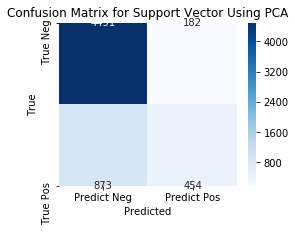

In [18]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
              xticklabels = ['Predict Neg', 'Predict Pos'], 
            yticklabels = ['True Neg', 'True Pos'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for Support Vector Using PCA")
plt.show()

In [2]:
#Wheat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpl
import scipy
import sklearn
import io
from sklearn.preprocessing import StandardScaler

wheat = pd.read_csv(r'C:\Users\PC\Documents\R\wheat.csv')

pd.set_option('display.max_rows', 8)

#can dro the 'id' col
# cancer.drop(['id'], inplace = True, axis = 1)

# reanme some cols
wheat=wheat.rename(columns={'Kernel Length':'Kernel_Length', 
                                'Asymmetry coefficient':'Asymmetry_coeff', 
                            'Kernel Width':'Kernel_width',
                            'Kernel groove length':'Kernel_groove_len'})
# Assign X and y
X = wheat.drop('Variety', axis = 1)
y = wheat['Variety']

# scale it
scaler = StandardScaler() 
scaler.fit(X) 
X_scaled = scaler.transform(X)

wheat.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_width,Asymmetry_coeff,Kernel_groove_len,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
print('Count of data type in dataset')
wheat.get_dtype_counts()

Count of data type in dataset


float64    7
int64      1
dtype: int64

In [6]:
wheat.shape

(210, 8)

In [7]:
print('Check dataset for Null Values')
wheat.isnull().sum() / wheat.shape[0]

Check dataset for Null Values


Area                 0.0
Perimeter            0.0
Compactness          0.0
Kernel_Length        0.0
Kernel_width         0.0
Asymmetry_coeff      0.0
Kernel_groove_len    0.0
Variety              0.0
dtype: float64

In [8]:
wheat.describe()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_width,Asymmetry_coeff,Kernel_groove_len,Variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [9]:
wheat["Variety"].value_counts()

3    70
2    70
1    70
Name: Variety, dtype: int64

In [11]:
# Seperate the y from the x columns
X = wheat.drop('Variety',axis=1)
Y = wheat['Variety']

# for roc curve
#Y =  = label_binarize(y, classes=[0, 1, 2])
#n_classes = y.shape[1] 

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.30, random_state=1)
print('--------------- Split-out dataset [Done]')

--------------- Split-out dataset [Done]


In [12]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))

Original dataset shape Counter({1: 70, 2: 70, 3: 70})


Applying dimensionality Reduction using Principal Component Analysis [PCA]
Best parameter (CV score=0.884):
{'m__criterion': 'gini', 'm__max_depth': None, 'm__max_leaf_nodes': None, 'm__min_samples_leaf': 1, 'm__min_samples_split': 2, 'pca__n_components': 5}


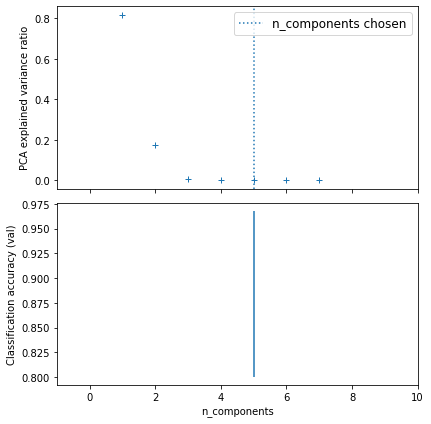

In [13]:
print('Applying dimensionality Reduction using Principal Component Analysis [PCA]')
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model1 = DecisionTreeClassifier(random_state=0)
#resample = SVMSMOTE(random_state = 42)
pipe_dt = Pipeline([('s', scaler), ('pca', pca),('m', model1)])

#pipe_dt.fit(X_train, Y_train)

# set parameters of pipelines using ‘__’ separated parameter names:

param_grid = {"pca__n_components":[5, 10, 15, 20, 30],
              "m__criterion": ["gini", "entropy"],
              "m__min_samples_split": [2, 10, 20],
              "m__max_depth": [None, 2, 5, 10],
              "m__min_samples_leaf": [1, 5, 10],
              "m__max_leaf_nodes": [None, 5, 10, 20],
              }

search = GridSearchCV(pipe_dt, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_dt = search.fit(X_train, y_train)
#Get Best Parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 10)

plt.tight_layout()
plt.show()

In [14]:
#----------Test Best Parameters---------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time

t0 = time()
clf_dt =clf_dt.best_estimator_
y_pred_dt = clf_dt.predict(X_validation)
print("done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cv_dt = cross_val_score(clf_dt, X_train, y_train, cv=cv)

done in 0.001s


In [15]:
print('Applying dimensionality Reduction using Principal Component Analysis [PCA]')
from sklearn.svm import SVC
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import Pipeline

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model4 = SVC(class_weight = 'balanced', probability=True)
#resample 
resample = SVMSMOTE(random_state=0)
pipe_svc = Pipeline(steps=[('s', scaler), ('pca', pca), ('r', resample), ('m', model4)])


# set parameters of pipelines using ‘__’ separated parameter names:
param_grid = [{'m__kernel': ['rbf'], 'm__gamma': [1e-3, 1e-4],
              'm__C': [1, 10,100,1000]},
              {'m__kernel': ['linear'], 'm__C': [1, 10,100,1000]}]

search = GridSearchCV(pipe_svc, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_svc = search.fit(X_train, y_train)
#Get Best Parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Applying dimensionality Reduction using Principal Component Analysis [PCA]
Best parameter (CV score=0.945):
{'m__C': 100, 'm__kernel': 'linear'}


In [16]:
#----------Test Best Parameters---------
t0 = time()
clf_svc =clf_svc.best_estimator_
y_pred_svc = clf_svc.predict(X_validation)
print("Done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cv_svc = cross_val_score(clf_svc, X_train, y_train, cv=cv)

Done in 0.002s


In [17]:
#---------Classification report--------
print ("----------------------> [Support Vector performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred_svc, y_validation)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_svc.mean(),
                                          scores_cv_svc.std()),
                                          end="\n\n" )
print(confusion_matrix(y_validation,y_pred_svc))
print(classification_report(y_validation,y_pred_svc))
print('Misclassified examples: %d' % (y_validation != y_pred_svc).sum())
print('Misclassification/Error rate: %.3f' % ((y_validation != y_pred_svc).sum()/y_pred_svc.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf_svc.score(X_validation, y_validation)))
print("Training set Accuracy: {:.3f}".format(clf_svc.score(X_train, y_train)))
print('--------------- Support Vector Classifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [Support Vector performance summary]
Accuracy: 0.952
mean: 0.941 (std: 0.049)

[[21  0  3]
 [ 0 18  0]
 [ 0  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.88      0.93        24
           2       1.00      1.00      1.00        18
           3       0.88      1.00      0.93        21

    accuracy                           0.95        63
   macro avg       0.96      0.96      0.96        63
weighted avg       0.96      0.95      0.95        63

Misclassified examples: 3
Misclassification/Error rate: 0.023 %
Test set Accuracy: 0.952
Training set Accuracy: 0.980
--------------- Support Vector Classifier --Parameters specified-- : classifier.fit [Done]


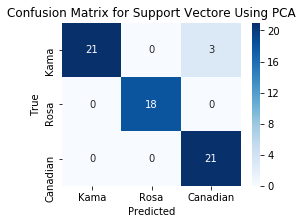

In [18]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_validation, y_pred_svc)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
              xticklabels = ['Kama', 'Rosa', 'Canadian'], 
            yticklabels = ['Kama', 'Rosa','Canadian'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for Support Vectore Using PCA");


PC 1 with:
 [ 0.44696773  0.44423254  0.25578801  0.42830414  0.43526808 -0.09229136
  0.39500552]

PC 2 with:
 [ 0.01958073  0.07512021 -0.56101306  0.18598592 -0.11483869  0.71419767
  0.34839761]


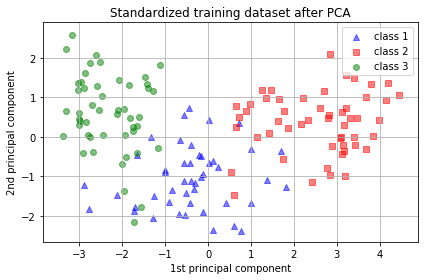

In [21]:
FIG_SIZE = (10, 7)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_svc.fit(X_train, y_train)
pred_test_std = pipe_svc.predict(X_validation)

# Show prediction accuracies in scaled and unscaled data.
#print('\nPrediction accuracy for the standardized test dataset with PCA -SVC')
#print('{:.2%}\n'.format(metrics.accuracy_score(y_validation, pred_test_std)))

# Extract PCA from pipeline
pca_std = pipe_svc.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_svc.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(1, 4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training dataset after PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()

plt.show()